## Importy i instalacje

In [1]:
%pip install --upgrade ipywidgets tqdm jupyterlab_widgets

  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.67.1
    Uninstalling tqdm-4.67.1:
      Successfully uninstalled tqdm-4.67.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.colors as mcolors
from sklearn.ensemble import RandomForestClassifier


from tqdm.notebook import tqdm   # lub from tqdm import tqdm


## Wczytanie pliku .tsv

In [3]:
from pathlib import Path

sciezka = Path(r"D:\bacteria-forest\PythonProject_WSB\MoMA\data.tsv")

df = pd.read_csv(sciezka, sep=',')

## Opisy i statystyki

In [4]:
df.describe()

,view,label,track_label,fov,timepoint,trench,trench_lineage,lineage_cellid,parent_lineage_cellid,cell_generation,...,geometry_Area,geometry_Num_Pixels,geometry_Orientation,geometry_Perimeter,axis_major_length,axis_minor_length,total_intensity_Trans,total_intensity_GFP,mean_intensity_Trans,mean_intensity_GFP
count,447215.000000,4.472150e+05,4.469610e+05,447215.000000,447215.000000,447215.000000,446961.000000,446961.000000,446961.000000,446961.000000,...,447215.000000,447215.000000,447215.000000,447215.000000,447215.000000,447215.000000,4.472150e+05,4.472150e+05,447215.000000,447215.000000
mean,778.132375,7.782314e+07,7.781852e+07,7.695057,99.018693,8.626656,0.100203,324.865480,289.999573,21.617855,...,2.463258,146.511667,0.045752,6.566187,2.963513,1.056005,9.324369e+05,3.040003e+05,6332.953777,2175.926096
std,389.097918,3.890996e+07,3.890293e+07,3.889875,54.631965,5.127658,0.524479,274.017383,276.253777,16.881131,...,1.330099,79.112715,0.359624,2.502814,1.333125,0.157500,5.243320e+05,2.478625e+05,471.513441,772.917587
min,0.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.336254,20.000000,-1.570796,1.770800,0.676244,0.204241,6.880900e+04,1.669700e+04,3030.083333,827.714286
25%,505.000000,5.050970e+07,5.050015e+07,5.000000,53.000000,4.000000,0.000000,92.000000,41.000000,8.000000,...,1.698083,101.000000,-0.080281,5.097566,2.189789,0.953138,6.327240e+05,2.129130e+05,6106.648841,1592.374456
50%,805.000000,8.051691e+07,8.050087e+07,8.000000,100.000000,9.000000,0.000000,253.000000,208.000000,18.000000,...,2.202465,131.000000,0.029207,6.121844,2.698150,1.042252,8.268700e+05,2.686190e+05,6465.863636,2022.570175
75%,1106.000000,1.106143e+08,1.106005e+08,11.000000,146.000000,13.000000,0.000000,526.000000,487.000000,31.000000,...,2.891786,172.000000,0.221017,7.431514,3.402994,1.140857,1.095049e+06,3.432500e+05,6646.692308,2613.952721
max,1417.000000,1.417192e+08,1.417800e+08,14.000000,192.000000,17.000000,9.000000,1192.000000,1190.000000,86.000000,...,37.710900,2243.000000,1.570796,54.216460,28.321413,2.438012,1.473042e+07,1.166695e+07,9098.240000,11501.072785


In [5]:
df.head()

,view,label,track_label,fov,timepoint,trench,trench_lineage,lineage_cellid,parent_lineage_cellid,cell_generation,...,geometry_Area,geometry_Num_Pixels,geometry_Orientation,geometry_Perimeter,axis_major_length,axis_minor_length,total_intensity_Trans,total_intensity_GFP,mean_intensity_Trans,mean_intensity_GFP
0,3,300001,300001.0,0,0,3,0.0,1.0,0.0,0.0,...,4.035049,240,-0.028540,9.493104,4.459548,1.227772,1442079.0,579320.0,6008.662500,2413.833333
1,3,300002,310001.0,0,0,3,1.0,1.0,0.0,0.0,...,3.614732,215,-0.179144,8.898493,4.149844,1.137284,1393897.0,527441.0,6483.241860,2453.213953
2,3,300003,320001.0,0,0,3,2.0,1.0,0.0,0.0,...,4.404929,262,-0.063223,10.056252,4.744540,1.237812,1771086.0,714256.0,6759.870229,2726.167939
3,3,300004,330001.0,0,0,3,3.0,1.0,0.0,0.0,...,5.396879,321,0.009731,11.460308,5.509410,1.280791,2233444.0,783376.0,6957.769470,2440.423676
4,2,200001,200001.0,0,0,2,0.0,1.0,0.0,0.0,...,3.093538,184,0.024044,7.431514,3.496925,1.136609,1092107.0,325942.0,5935.364130,1771.423913


In [6]:
nan_summary = pd.DataFrame({
    'Liczba NaN': df.isna().sum(),
})

print(nan_summary)

                       Liczba NaN
view                            0
label                           0
track_label                   254
fov                             0
timepoint                       0
trench                          0
trench_lineage                254
lineage_cellid                254
parent_lineage_cellid         254
cell_generation               254
center_y                        0
center_x                        0
bbox_min_y                      0
bbox_min_x                      0
bbox_max_y                      0
bbox_max_x                      0
geometry_Area                   0
geometry_Num_Pixels             0
geometry_Orientation            0
geometry_Perimeter              0
axis_major_length               0
axis_minor_length               0
total_intensity_Trans           0
total_intensity_GFP             0
mean_intensity_Trans            0
mean_intensity_GFP              0


## Wybór cech do analizy

In [7]:
from sklearn.preprocessing import StandardScaler

features = [
    'geometry_Area',
    'axis_major_length',
    'axis_minor_length',
    'geometry_Perimeter',
    'mean_intensity_Trans',
    'mean_intensity_GFP',
    'total_intensity_GFP',
    'total_intensity_Trans',
]


# Wyciągamy cechy + usuwamy NaN
X_df = df[features].dropna().copy()

# Skalowanie
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

print(f"Po usunięciu NaN zostało {len(X_df):,} wierszy")

Po usunięciu NaN zostało 447,215 wierszy


## Klastrowanie metodą MiniBatchKMeans z próbkowaniem

Użyto próbki 50,000 wierszy


MiniBatchKMeans na próbce:   0%|          | 0/8 [00:00<?, ?it/s]

D:\mamba\envs\data-spec-loupe\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


k= 2 | inertia=2.85e+05 | sil=0.3790
k= 3 | inertia=2.14e+05 | sil=0.3016
k= 4 | inertia=2.14e+05 | sil=0.1859
k= 5 | inertia=1.60e+05 | sil=0.2430
k= 6 | inertia=1.51e+05 | sil=0.2227
k= 7 | inertia=1.46e+05 | sil=0.2208
k= 8 | inertia=1.31e+05 | sil=0.1859
k= 9 | inertia=1.24e+05 | sil=0.2115


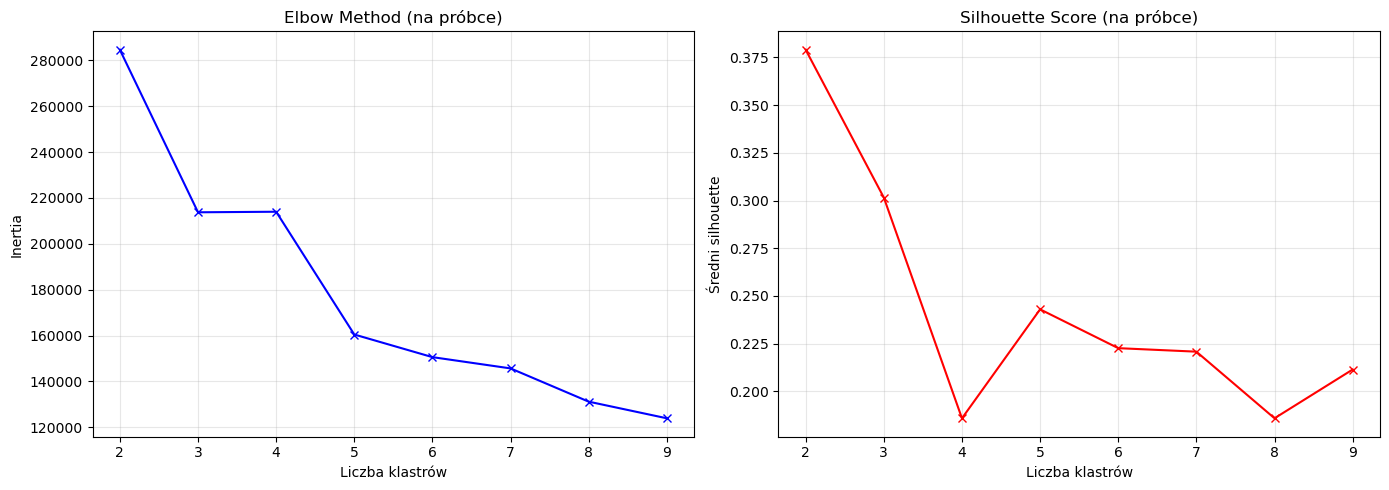

In [8]:
# Próbka 50.000 rekordów

sample_size = 50000

rng = np.random.default_rng(42)
idx_sample = rng.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[idx_sample]

inertias = []
sil_scores = []
K = range(2, 10)

#TQDM - pasek postępu
#MBK - miniBatchKmeans

for k in tqdm(K, desc="MiniBatchKMeans na próbce"):
    mbk = MiniBatchKMeans(
        n_clusters=k,
        random_state=42,
        batch_size=4096,
        n_init=10,
        max_iter=100,
        max_no_improvement=20,
        reassignment_ratio=0.01
    )
    
    mbk.fit(X_sample)
    inertias.append(mbk.inertia_)
    
    # silhouette – tylko na próbce (bardzo przyspiesza)
    labels_sample = mbk.labels_
    sil = silhouette_score(X_sample, labels_sample)
    sil_scores.append(sil)
# liczy inercję (dla wykresu łokciowego) i współczynnik sylwetkowy dla danej ilości klastrów 
    print(f"k={k:2d} | inertia={mbk.inertia_:.2e} | sil={sil:.4f}")



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(K, inertias, 'bx-')
ax1.set_title('Elbow Method (na próbce)')
ax1.set_xlabel('Liczba klastrów')
ax1.set_ylabel('Inertia')
ax1.grid(True, alpha=0.3)

ax2.plot(K, sil_scores, 'rx-')
ax2.set_title('Silhouette Score (na próbce)')
ax2.set_xlabel('Liczba klastrów')
ax2.set_ylabel('Średni silhouette')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Definicje do wizualizacji

In [10]:
# funkcja będzie wykorzystywana dla kolejnych k = [2, 3, 5]

def model_dla_best_k(best_k):
    mbk = MiniBatchKMeans(
    n_clusters=best_k,
    random_state=42,
    batch_size=4096,
    n_init=10
    )
    mbk.fit(X_sample)
    labels = mbk.labels_
    return mbk

## Klastry dla k=2

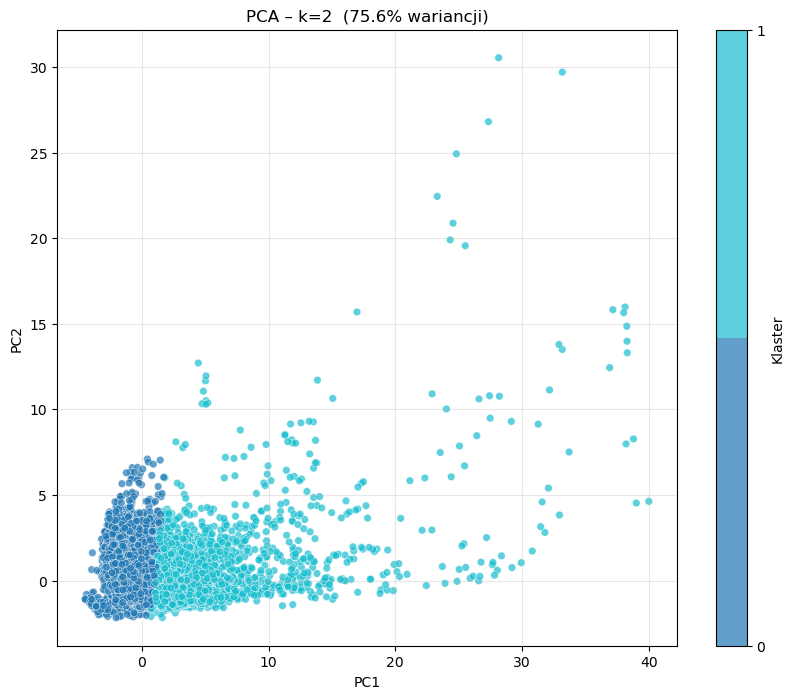

In [11]:
best_k = 2


model = model_dla_best_k(best_k)
labels = model.labels_


# Teraz PCA i rysowanie
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

explained = pca.explained_variance_ratio_.sum() * 100

plt.figure(figsize=(10, 8))

# Najpewniejsza paleta – dokładnie tyle kolorów ile klastrów
from matplotlib.colors import ListedColormap
colors = plt.cm.tab10(np.linspace(0, 1, best_k))          # tylko 2 kolory
custom_cmap = ListedColormap(colors)

scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    cmap=custom_cmap,           # ← to załatwia sprawę
    s=30,
    alpha=0.7,
    edgecolor='white',
    linewidth=0.4
)

plt.colorbar(scatter, label='Klaster', ticks=range(best_k))
plt.title(f'PCA – k={best_k}  ({explained:.1f}% wariancji)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.3)
plt.show()

In [13]:
# Feature importance – traktujemy klastry jak klasy
print(f"\nObliczanie ważności cech dla k = {best_k} ...")

rf = RandomForestClassifier(
    n_estimators=120,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_sample, labels)

# Które cechy najbardziej wpływają na wynik
imp_rf = pd.Series(rf.feature_importances_,
                   index=features)
imp_rf = imp_rf.sort_values(ascending=False)

print("\nTop 10 cech – RandomForest importances:")
print(imp_rf.head(10).round(4))


Obliczanie ważności cech dla k = 2 ...

Top 10 cech – RandomForest importances:
total_intensity_Trans    0.3246
geometry_Area            0.2778
geometry_Perimeter       0.1656
axis_major_length        0.1085
axis_minor_length        0.0566
mean_intensity_GFP       0.0281
total_intensity_GFP      0.0223
mean_intensity_Trans     0.0165
dtype: float64


In [14]:
# ─── Predykcja na całym zbiorze ───────────────────────────────────────────────
# Najlepiej: najpierw przeskalować cały zbiór, potem predict
labels = model.predict(X_scaled)

X_df['cluster_k2'] = labels               # ← poprawione: labels, nie labels_3

# ─── Podsumowanie ─────────────────────────────────────────────────────────────
features_to_show = features.copy()        # lista cech do pokazania

summary_k3 = X_df.groupby('cluster_k2')[features_to_show].agg(
    ['mean', 'median', 'std', 'count']    # dodałem std – bardzo przydatne
).round(3)

print(f"Statystyki dla k = {best_k}")
display(summary_k3)

print("\nProcentowy rozkład klastrów:")
print((X_df['cluster_k2'].value_counts(normalize=True) * 100).round(1))

print("\nLiczebność klastrów:")
print(X_df['cluster_k2'].value_counts().sort_index())

Statystyki dla k = 2


geometry_Area                       axis_major_length         \
                    mean median    std   count              mean median   
cluster_k2                                                                
0                  2.002  1.984  0.524  350193             2.533  2.473   
1                  4.129  3.648  1.903   97022             4.518  4.128   

                          axis_minor_length         ... mean_intensity_GFP  \
              std   count              mean median  ...                std   
cluster_k2                                          ...                      
0           0.583  350193             1.014  1.007  ...            745.404   
1           1.969   97022             1.206  1.185  ...            692.905   

                   total_intensity_GFP                                \
             count                mean    median         std   count   
cluster_k2                                                             
0           350193          266735.112  248251.0   95227.782  350193   
1            97022          438506.012  347757.5  476812.008   97022   

           total_intensity_Trans                                 
                            mean     median         std   count  
cluster_k2                                                       
0                     748745.823   740860.0  203530.225  350193  
1                    1595454.932  1404653.0  745883.086   97022  

[2 rows x 32 columns]


Procentowy rozkład klastrów:
cluster_k2
0    78.3
1    21.7
Name: proportion, dtype: float64

Liczebność klastrów:
cluster_k2
0    350193
1     97022
Name: count, dtype: int64


In [15]:
imp_rf.index.tolist()[0:3]

['total_intensity_Trans', 'geometry_Area', 'geometry_Perimeter']

C:\Users\jusdu\AppData\Local\Temp\ipykernel_41604\587338339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_k2', y=feat, data=X_df, palette='tab10')


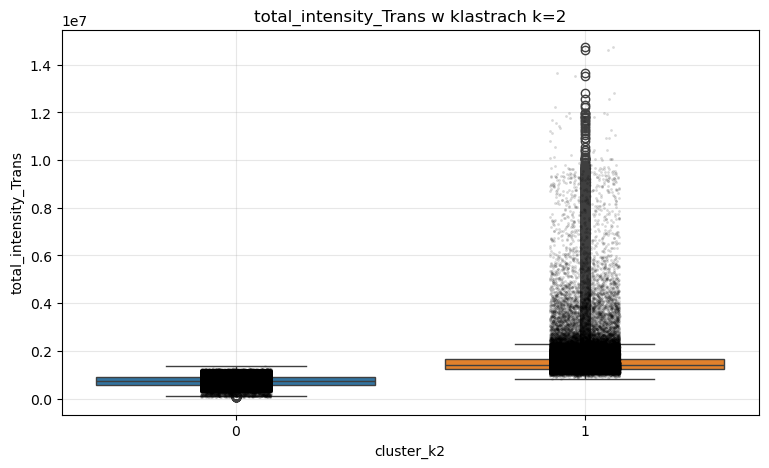

C:\Users\jusdu\AppData\Local\Temp\ipykernel_41604\587338339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_k2', y=feat, data=X_df, palette='tab10')


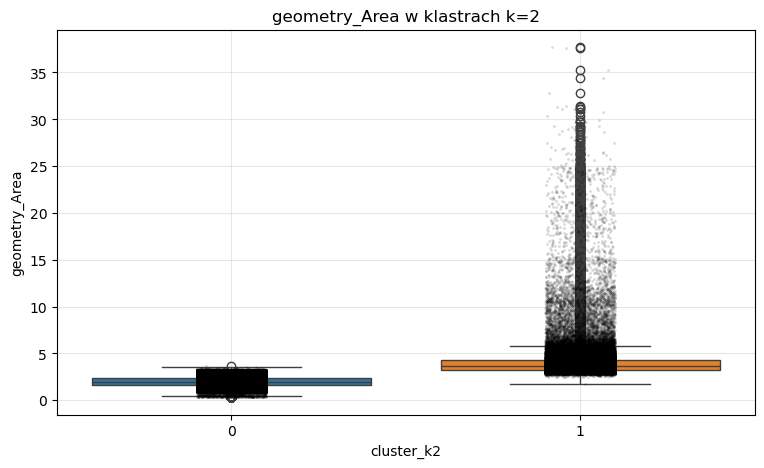

C:\Users\jusdu\AppData\Local\Temp\ipykernel_41604\587338339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_k2', y=feat, data=X_df, palette='tab10')


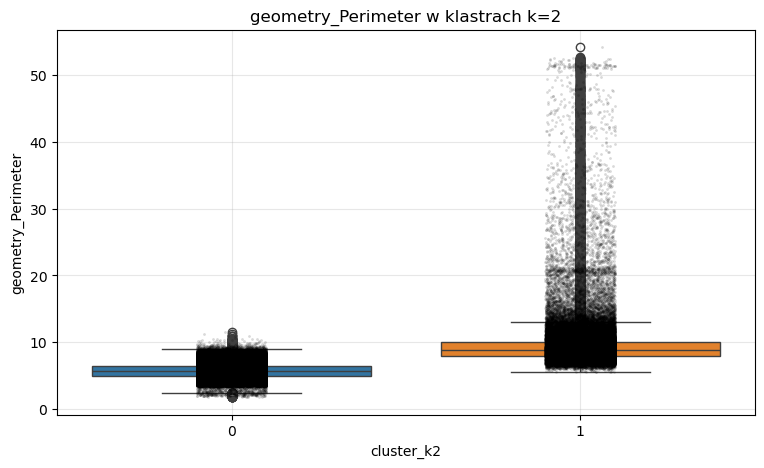

In [16]:
# Boxploty dla najważniejszych cech
key_feats = imp_rf.index.tolist()[0:3]

for feat in key_feats:
    plt.figure(figsize=(9, 5))
    sns.boxplot(x='cluster_k2', y=feat, data=X_df, palette='tab10')
    sns.stripplot(x='cluster_k2', y=feat, data=X_df, color='black', alpha=0.15, size=2)
    plt.title(f'{feat} w klastrach k=2')
    plt.grid(True, alpha=0.3)
    plt.show()

## Klastry dla k=3

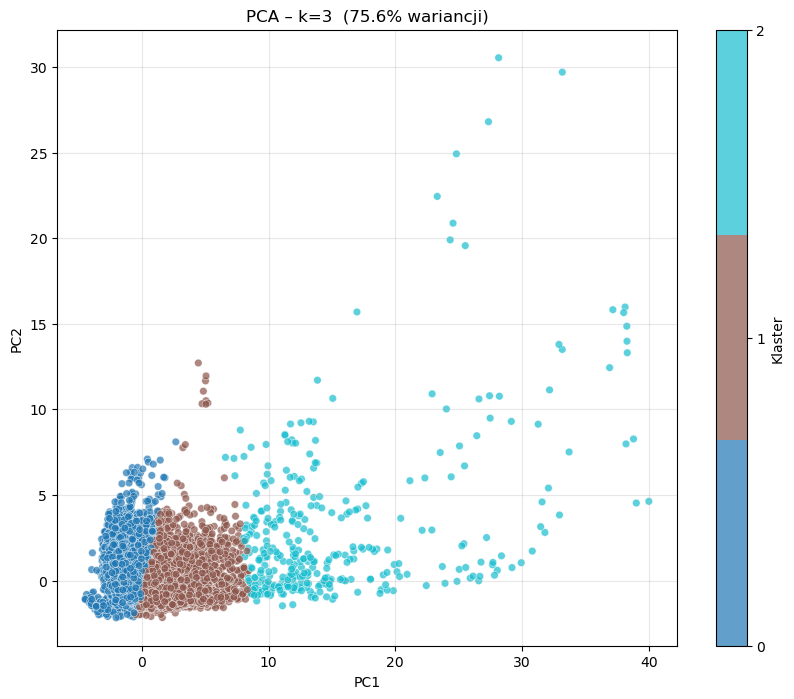

In [29]:
best_k = 3


model = model_dla_best_k(best_k)
labels = model.labels_


# Teraz PCA i rysowanie
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

explained = pca.explained_variance_ratio_.sum() * 100

plt.figure(figsize=(10, 8))

# Najpewniejsza paleta – dokładnie tyle kolorów ile klastrów
from matplotlib.colors import ListedColormap
colors = plt.cm.tab10(np.linspace(0, 1, best_k))          # tylko 3 kolory
custom_cmap = ListedColormap(colors)

scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    cmap=custom_cmap,           # ← to załatwia sprawę
    s=30,
    alpha=0.7,
    edgecolor='white',
    linewidth=0.4
)

plt.colorbar(scatter, label='Klaster', ticks=range(best_k))
plt.title(f'PCA – k={best_k}  ({explained:.1f}% wariancji)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.3)
plt.show()

In [30]:
# Feature importance – traktujemy klastry jak klasy
print(f"\nObliczanie ważności cech dla k = {best_k} ...")

rf = RandomForestClassifier(
    n_estimators=120,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_sample, labels)

# Które cechy najbardziej wpływają na wynik
imp_rf = pd.Series(rf.feature_importances_,
                   index=features)
imp_rf = imp_rf.sort_values(ascending=False)

print("\nTop 10 cech – RandomForest importances:")
print(imp_rf.head(10).round(4))


Obliczanie ważności cech dla k = 3 ...

Top 10 cech – RandomForest importances:
total_intensity_Trans    0.3073
geometry_Area            0.2634
geometry_Perimeter       0.1550
axis_major_length        0.0965
axis_minor_length        0.0638
mean_intensity_GFP       0.0601
total_intensity_GFP      0.0397
mean_intensity_Trans     0.0141
dtype: float64


In [31]:
labels = model.predict(X_scaled)

X_df['cluster_k3'] = labels               

features_to_show = features.copy()        # lista cech do pokazania

summary_k3 = X_df.groupby('cluster_k3')[features_to_show].agg(
    ['mean', 'median', 'std', 'count']   
).round(3)

print(f"Statystyki dla k = {best_k}")
display(summary_k3)

print("\nProcentowy rozkład klastrów:")
print((X_df['cluster_k3'].value_counts(normalize=True) * 100).round(1))

print("\nLiczebność klastrów:")
print(X_df['cluster_k3'].value_counts().sort_index())

Statystyki dla k = 3


geometry_Area                        axis_major_length          \
                    mean  median    std   count              mean  median   
cluster_k3                                                                  
0                  1.814   1.816  0.411  276121             2.360   2.314   
1                  3.340   3.110  0.845  167775             3.772   3.609   
2                 12.102  10.609  4.626    3319            12.297  10.674   

                          axis_minor_length         ... mean_intensity_GFP  \
              std   count              mean median  ...                std   
cluster_k3                                          ...                      
0           0.482  276121             0.988  0.985  ...            745.408   
1           0.925  167775             1.162  1.143  ...            549.604   
2           5.149    3319             1.363  1.304  ...           1860.119   

                   total_intensity_GFP                                  \
             count                mean     median          std   count   
cluster_k3                                                               
0           276121          259934.631   241139.0    95435.603  276121   
1           167775          342884.797   312522.0   140352.712  167775   
2             3319         2004396.553  1407927.0  1842902.495    3319   

           total_intensity_Trans                                  
                            mean     median          std   count  
cluster_k3                                                        
0                     675253.692   677851.0   158595.968  276121  
1                    1281433.382  1185536.0   340502.064  167775  
2                    4686822.594  4057531.0  1826715.479    3319  

[3 rows x 32 columns]


Procentowy rozkład klastrów:
cluster_k3
0    61.7
1    37.5
2     0.7
Name: proportion, dtype: float64

Liczebność klastrów:
cluster_k3
0    276121
1    167775
2      3319
Name: count, dtype: int64


In [32]:
imp_rf.index.tolist()[0:3]

['total_intensity_Trans', 'geometry_Area', 'geometry_Perimeter']

C:\Users\jusdu\AppData\Local\Temp\ipykernel_41604\1144565388.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_k3', y=feat, data=X_df, palette='tab10')


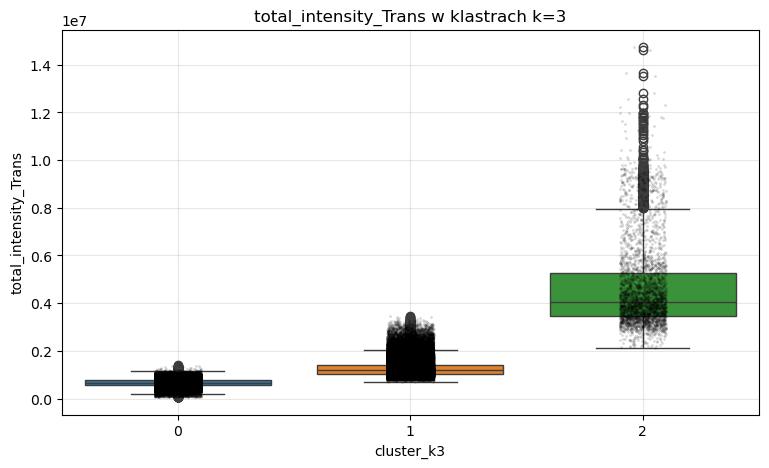

C:\Users\jusdu\AppData\Local\Temp\ipykernel_41604\1144565388.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_k3', y=feat, data=X_df, palette='tab10')


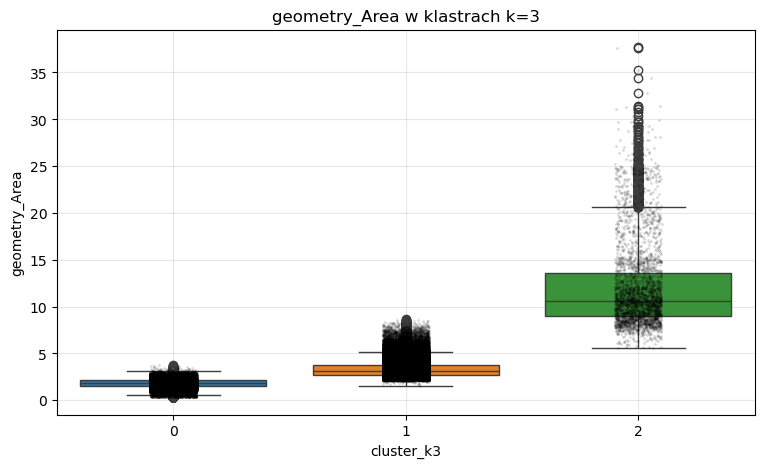

C:\Users\jusdu\AppData\Local\Temp\ipykernel_41604\1144565388.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_k3', y=feat, data=X_df, palette='tab10')


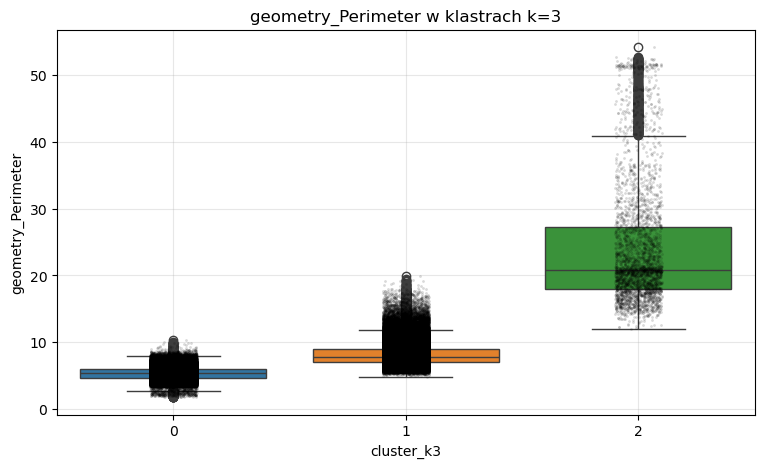

In [33]:
# Boxploty dla najważniejszych cech
key_feats = imp_rf.index.tolist()[0:3]

for feat in key_feats:
    plt.figure(figsize=(9, 5))
    sns.boxplot(x='cluster_k3', y=feat, data=X_df, palette='tab10')
    sns.stripplot(x='cluster_k3', y=feat, data=X_df, color='black', alpha=0.15, size=2)
    plt.title(f'{feat} w klastrach k=3')
    plt.grid(True, alpha=0.3)
    plt.show()

## Klastry dla k=5

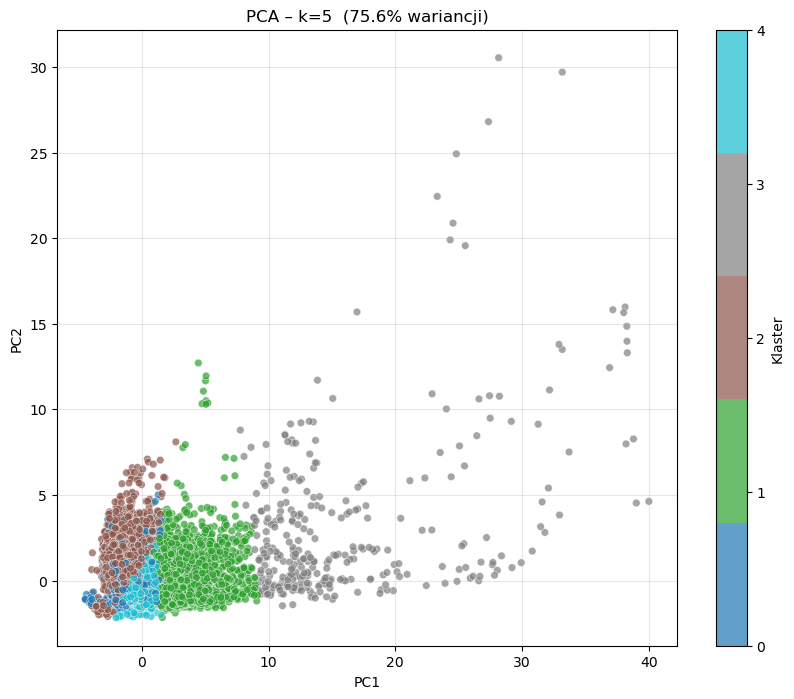

In [34]:
best_k = 5


model = model_dla_best_k(best_k)
labels = model.labels_


# Teraz PCA i rysowanie
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

explained = pca.explained_variance_ratio_.sum() * 100

plt.figure(figsize=(10, 8))

# Najpewniejsza paleta – dokładnie tyle kolorów ile klastrów
from matplotlib.colors import ListedColormap
colors = plt.cm.tab10(np.linspace(0, 1, best_k))          # tylko 3 kolory
custom_cmap = ListedColormap(colors)

scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    cmap=custom_cmap,           # ← to załatwia sprawę
    s=30,
    alpha=0.7,
    edgecolor='white',
    linewidth=0.4
)

plt.colorbar(scatter, label='Klaster', ticks=range(best_k))
plt.title(f'PCA – k={best_k}  ({explained:.1f}% wariancji)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.3)
plt.show()

In [35]:
# Feature importance – traktujemy klastry jak klasy
print(f"\nObliczanie ważności cech dla k = {best_k} ...")

rf = RandomForestClassifier(
    n_estimators=120,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_sample, labels)

# Które cechy najbardziej wpływają na wynik
imp_rf = pd.Series(rf.feature_importances_,
                   index=features)
imp_rf = imp_rf.sort_values(ascending=False)

print("\nTop 10 cech – RandomForest importances:")
print(imp_rf.head(10).round(4))


Obliczanie ważności cech dla k = 5 ...

Top 10 cech – RandomForest importances:
mean_intensity_Trans     0.2286
total_intensity_Trans    0.2148
geometry_Area            0.1852
mean_intensity_GFP       0.1284
geometry_Perimeter       0.0841
axis_major_length        0.0654
axis_minor_length        0.0472
total_intensity_GFP      0.0463
dtype: float64


In [36]:
# ─── Predykcja na całym zbiorze ───────────────────────────────────────────────
# Najlepiej: najpierw przeskalować cały zbiór, potem predict
labels = model.predict(X_scaled)

X_df['cluster_k5'] = labels               # ← poprawione: labels, nie labels_3

# ─── Podsumowanie ─────────────────────────────────────────────────────────────
features_to_show = features.copy()        # lista cech do pokazania

summary = X_df.groupby('cluster_k5')[features_to_show].agg(
    ['mean', 'median', 'std', 'count']    # dodałem std – bardzo przydatne
).round(3)

print(f"Statystyki dla k = {best_k}")
display(summary)

print("\nProcentowy rozkład klastrów:")
print((X_df['cluster_k5'].value_counts(normalize=True) * 100).round(1))

print("\nLiczebność klastrów:")
print(X_df['cluster_k5'].value_counts().sort_index())

Statystyki dla k = 5


geometry_Area                        axis_major_length          \
                    mean  median    std   count              mean  median   
cluster_k5                                                                  
0                  2.222   2.202  0.584   73705             2.798   2.739   
1                  4.041   3.800  0.844   76182             4.423   4.264   
2                  1.606   1.564  0.361  142428             2.167   2.095   
3                 12.579  10.928  4.645    2979            12.800  10.873   
4                  2.395   2.387  0.403  151921             2.866   2.831   

                          axis_minor_length         ... mean_intensity_GFP  \
              std   count              mean median  ...                std   
cluster_k5                                          ...                      
0           0.691   73705             1.027  1.018  ...            586.779   
1           0.957   76182             1.214  1.194  ...            617.736   
2           0.427  142428             0.951  0.948  ...            715.487   
3           5.188    2979             1.359  1.300  ...           1922.518   
4           0.510  151921             1.083  1.079  ...            448.619   

                   total_intensity_GFP                                  \
             count                mean     median          std   count   
cluster_k5                                                               
0            73705          260356.172   244636.0    92680.557   73705   
1            76182          405762.188   359177.5   172280.213   76182   
2           142428          275117.946   254442.5   108792.312  142428   
3             2979         2118118.072  1499243.0  1907908.891    2979   
4           151921          265649.910   249451.0    80287.056  151921   

           total_intensity_Trans                                  
                            mean     median          std   count  
cluster_k5                                                        
0                     731064.641   723191.0   200582.478   73705  
1                    1562557.109  1469035.0   342026.884   76182  
2                     611745.842   599247.0   144087.601  142428  
3                    4866964.878  4217498.0  1841561.642    2979  
4                     937655.126   933042.0   162488.604  151921  

[5 rows x 32 columns]


Procentowy rozkład klastrów:
cluster_k5
4    34.0
2    31.8
1    17.0
0    16.5
3     0.7
Name: proportion, dtype: float64

Liczebność klastrów:
cluster_k5
0     73705
1     76182
2    142428
3      2979
4    151921
Name: count, dtype: int64


In [37]:
imp_rf.index.tolist()[0:3]

['mean_intensity_Trans', 'total_intensity_Trans', 'geometry_Area']

C:\Users\jusdu\AppData\Local\Temp\ipykernel_41604\1144565388.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_k3', y=feat, data=X_df, palette='tab10')


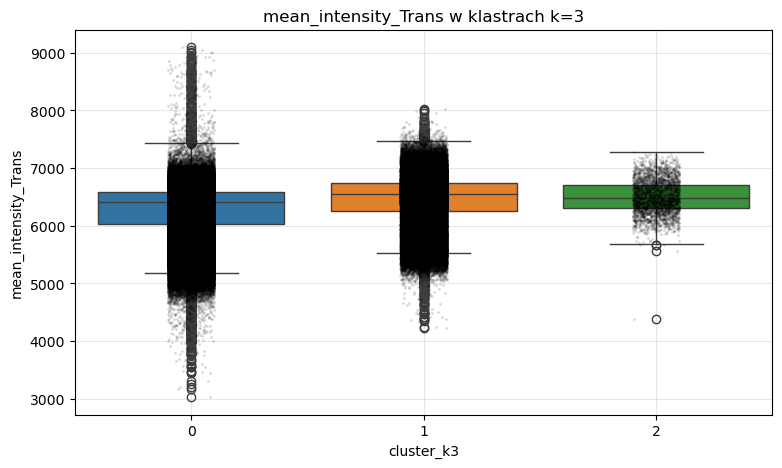

C:\Users\jusdu\AppData\Local\Temp\ipykernel_41604\1144565388.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_k3', y=feat, data=X_df, palette='tab10')


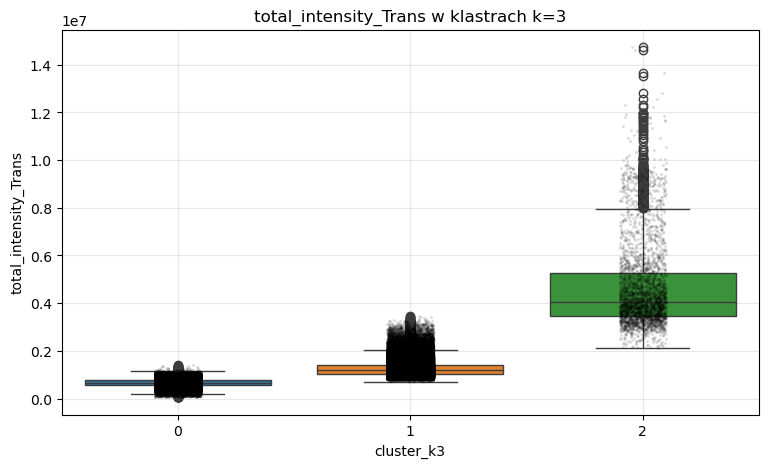

C:\Users\jusdu\AppData\Local\Temp\ipykernel_41604\1144565388.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_k3', y=feat, data=X_df, palette='tab10')


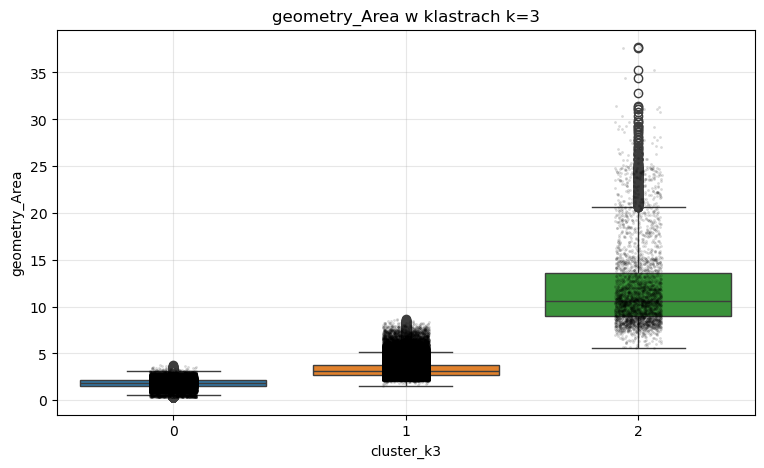

In [38]:
# Boxploty dla najważniejszych cech
key_feats = imp_rf.index.tolist()[0:3]

for feat in key_feats:
    plt.figure(figsize=(9, 5))
    sns.boxplot(x='cluster_k3', y=feat, data=X_df, palette='tab10')
    sns.stripplot(x='cluster_k3', y=feat, data=X_df, color='black', alpha=0.15, size=2)
    plt.title(f'{feat} w klastrach k=3')
    plt.grid(True, alpha=0.3)
    plt.show()

## Outliers

In [39]:
from sklearn.decomposition import PCA

# 1. Predykcja klastrów na całym zbiorze (jeśli jeszcze nie masz full_labels)
full_labels = model.predict(X_scaled)

# 2. PCA na całym zbiorze – bez żadnych masek/filtrów
pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X_scaled)

# Wyjaśniona wariancja
explained = pca_full.explained_variance_ratio_.sum() * 100
print(f"Wyjaśniona wariancja przez PC1 + PC2 (cały zbiór): {explained:.1f}%")

# Szczegóły – ile daje każdy komponent
print(f"PC1: {pca_full.explained_variance_ratio_[0]:.1%}")
print(f"PC2: {pca_full.explained_variance_ratio_[1]:.1%}")

# 3. Dodajemy PC1 i PC2 do oryginalnego df (całość, bez filtra)
df_with_pca = df.copy()
df_with_pca['PC1'] = X_pca_full[:, 0]
df_with_pca['PC2'] = X_pca_full[:, 1]
df_with_pca['cluster'] = full_labels

df_with_pca.head()

Wyjaśniona wariancja przez PC1 + PC2 (cały zbiór): 75.6%
PC1: 59.1%
PC2: 16.5%


,view,label,track_label,fov,timepoint,trench,trench_lineage,lineage_cellid,parent_lineage_cellid,cell_generation,...,geometry_Perimeter,axis_major_length,axis_minor_length,total_intensity_Trans,total_intensity_GFP,mean_intensity_Trans,mean_intensity_GFP,PC1,PC2,cluster
0,3,300001,300001.0,0,0,3,0.0,1.0,0.0,0.0,...,9.493104,4.459548,1.227772,1442079.0,579320.0,6008.662500,2413.833333,2.555489,0.672263,1
1,3,300002,310001.0,0,0,3,1.0,1.0,0.0,0.0,...,8.898493,4.149844,1.137284,1393897.0,527441.0,6483.241860,2453.213953,2.023770,0.571309,1
2,3,300003,320001.0,0,0,3,2.0,1.0,0.0,0.0,...,10.056252,4.744540,1.237812,1771086.0,714256.0,6759.870229,2726.167939,3.452028,1.043443,1
3,3,300004,330001.0,0,0,3,3.0,1.0,0.0,0.0,...,11.460308,5.509410,1.280791,2233444.0,783376.0,6957.769470,2440.423676,4.931090,0.720018,1
4,2,200001,200001.0,0,0,2,0.0,1.0,0.0,0.0,...,7.431514,3.496925,1.136609,1092107.0,325942.0,5935.364130,1771.423913,0.827538,-0.382263,4


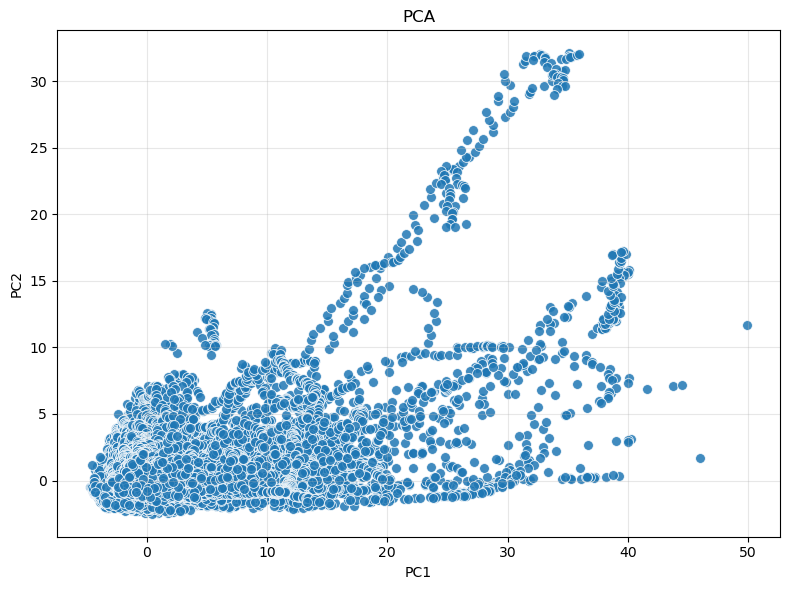

In [44]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    df_with_pca['PC1'],              # ← PC1 z nowej ramki
    df_with_pca['PC2'],              # ← PC2 z nowej ramki
    s=50,                           # trochę większe, bo mniej punktów
    alpha=0.85,
    edgecolor='white',
    linewidth=0.6
)

plt.title(f'PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [49]:
full_labels = model.predict(X_scaled)

# 2. PCA na całym zbiorze
pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X_scaled)

explained = pca_full.explained_variance_ratio_.sum() * 100

# 3. Maska ekstremalnych punktów
mask = (X_pca_full[:, 0] > 20) | (X_pca_full[:, 1] > 10)


result_df = df.iloc[mask].copy()      

# Dodajemy potrzebne kolumny
result_df['PC1']     = X_pca_full[mask, 0]
result_df['PC2']     = X_pca_full[mask, 1]
result_df['cluster'] = full_labels[mask]

print(f"\nZnaleziono {mask.sum():,} ekstremalnych punktów z {len(X_pca_full)}")

# Wybrane kolumny do wyświetlenia – tylko te, które na pewno istnieją
cols_to_show = features + ['PC1', 'PC2', 'cluster']

result_df.head()


Znaleziono 710 ekstremalnych punktów z 447215


,view,label,track_label,fov,timepoint,trench,trench_lineage,lineage_cellid,parent_lineage_cellid,cell_generation,...,geometry_Perimeter,axis_major_length,axis_minor_length,total_intensity_Trans,total_intensity_GFP,mean_intensity_Trans,mean_intensity_GFP,PC1,PC2,cluster
5841,13,1305801,1300010.0,0,58,13,0.0,10.0,9.0,9.0,...,29.922462,15.401497,1.593703,7296766.0,1402387.0,6682.020147,1284.237179,21.766997,-0.356945,3
5935,13,1305901,1300010.0,0,59,13,0.0,10.0,9.0,9.0,...,31.478428,16.280455,1.577939,7754029.0,1467410.0,6719.262565,1271.585789,23.157795,-0.313119,3
5996,7,706001,700009.0,0,60,7,0.0,9.0,8.0,8.0,...,36.709473,19.621841,1.039975,6199192.0,1220748.0,6672.973089,1314.045210,21.319220,-0.253256,3
6034,13,1306001,1300010.0,0,60,13,0.0,10.0,9.0,9.0,...,33.521587,17.466413,1.586013,8431034.0,1561903.0,6766.479936,1253.533708,25.181349,-0.271068,3
6094,7,706101,700009.0,0,61,7,0.0,9.0,8.0,8.0,...,39.878933,21.775130,1.016516,6720235.0,1313409.0,6680.154076,1305.575547,23.577645,-0.177355,3


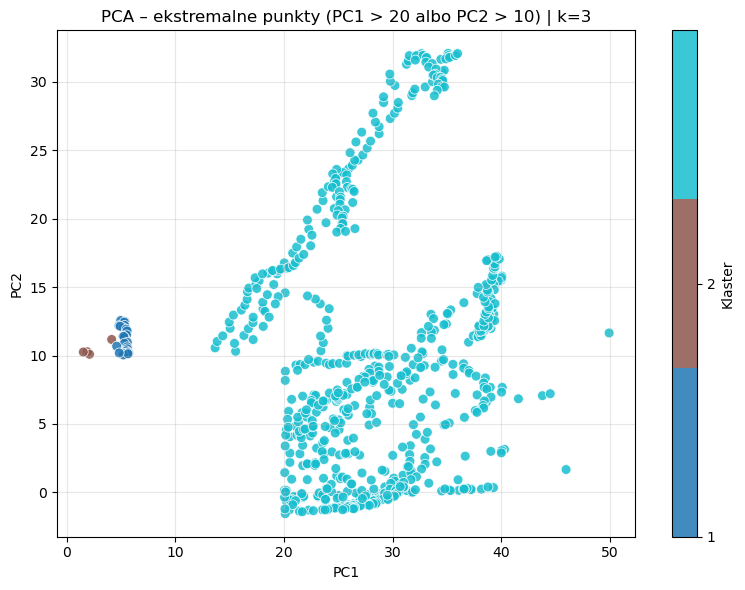

In [53]:
plt.figure(figsize=(8, 6))
best_k = 3
# dokładnie tyle kolorów ile klastrów
colors = plt.cm.tab10(np.linspace(0, 1, best_k))
custom_cmap = ListedColormap(colors)

scatter = plt.scatter(
    result_df['PC1'],              # ← PC1 z nowej ramki
    result_df['PC2'],              # ← PC2 z nowej ramki
    c=result_df['cluster'],        # kolory wg klastra
    cmap=custom_cmap,
    s=50,                           # trochę większe, bo mniej punktów
    alpha=0.85,
    edgecolor='white',
    linewidth=0.6
)

plt.colorbar(scatter, label='Klaster', ticks=range(best_k))

# procenty wyjaśnionej wariancji – możesz zostawić z pełnego PCA
plt.title(f'PCA – ekstremalne punkty (PC1 > 20 albo PC2 > 10) | k={best_k}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [55]:
import plotly.express as px

fig = px.scatter(
    result_df,                     # lub result_df / extreme_df
    x='PC1',
    y='PC2',
    color='cluster',                 # kolor wg klastra
    hover_data=['lineage_cellid', 'label', 'timepoint', 'fov', 'geometry_Area', 'mean_intensity_GFP'],
    # możesz dodać dowolne kolumny, które chcesz widzieć po najechaniu
    title='PCA – interaktywny scatter (hover = labelki)',
    width=900,
    height=700
)

fig.update_traces(
    marker=dict(size=8, opacity=0.7, line=dict(width=0.5, color='DarkSlateGrey'))
)

fig.update_layout(
    hovermode='closest',
    showlegend=True
)

fig.show(renderer="browser")

## Wybrane komórki według wykresu, najbardziej odstające wartości, którym należy się przyjrzeć

Dla klastra 3:
Najwyższe PC2
120913601
101118504
101119204

Najwyższe PC1 i PC2
91615401
91615501
91615101

Najwyższe PC2
70216701
41608601
70222801
70111701

Najwyższe PC2 dla klastra 0
120916002
120915902
120916102

Najwyższe PC2 dla klastra 4
131000308
131000107
131000207


In [65]:
wybrane_labele = [120913601, 101118504, 101119204, 91615401, 91615501, 91615101, 70216701, 41608601, 70222801, 70111701, 120916002, 120915902, 120916102, 131000308, 131000107, 131000207]

In [61]:
import napari
from dataspecloupe.explorer import Explorer

views_path = Path(r"D:\bacteria-forest\PythonProject_WSB\MoMA\views")
config_path = Path(r"D:\bacteria-forest\PythonProject_WSB\MoMA\data_config.yaml")
explorer = Explorer(views_root=views_path, data_path=sciezka)
explorer.set_config(config_path)
explorer.prepare_gui()

# here we can optionally pass only interesting subset of features
columns_to_explore = ['view', 'label', 'track_label', 'fov', 'timepoint', 'trench', 'trench_lineage', 'lineage_cellid', 'parent_lineage_cellid', 'cell_generation']
explorer.subset_data_columns(columns_to_explore)

napari_viewer = explorer.viewer
napari.run()

In [62]:
filtered_data = df[df['label'].isin(wybrane_labele)].copy()

In [63]:
filtered_data

,view,label,track_label,fov,timepoint,trench,trench_lineage,lineage_cellid,parent_lineage_cellid,cell_generation,...,geometry_Area,geometry_Num_Pixels,geometry_Orientation,geometry_Perimeter,axis_major_length,axis_minor_length,total_intensity_Trans,total_intensity_GFP,mean_intensity_Trans,mean_intensity_GFP
88384,416,41608601,41600028.0,4,86,16,0.0,28.0,27.0,27.0,...,37.710900,2243,0.013938,54.216460,28.290123,1.827901,14730420.0,3031137.0,6567.284886,1351.376282
192902,701,70111701,70100019.0,7,117,1,0.0,19.0,18.0,18.0,...,34.432423,2048,0.015998,48.712265,23.556776,1.947210,13524443.0,4895959.0,6603.731934,2390.604980
204308,702,70216701,70200035.0,7,167,2,0.0,35.0,34.0,34.0,...,37.559586,2234,0.015037,52.688930,26.713303,1.940231,14612038.0,6769192.0,6540.751119,3030.076992
278449,916,91615101,91600004.0,9,151,16,0.0,4.0,3.0,3.0,...,23.705917,1410,0.015946,51.674522,27.942501,1.194017,8902524.0,7481154.0,6313.846809,5305.782979
279024,916,91615401,91600004.0,9,154,16,0.0,4.0,3.0,3.0,...,23.470540,1396,0.016877,51.428226,28.047285,1.173915,8733721.0,7515819.0,6256.247135,5383.824499
279216,916,91615501,91600004.0,9,155,16,0.0,4.0,3.0,3.0,...,23.504164,1398,0.016000,50.878110,27.796764,1.157124,8822043.0,7497129.0,6310.474249,5362.753219
322508,1011,101118504,101100088.0,10,185,11,0.0,88.0,84.0,64.0,...,18.510790,1101,-0.001103,34.710808,17.599155,1.401365,7029138.0,11607277.0,6384.321526,10542.485922
323919,1011,101119204,101100072.0,10,192,11,0.0,72.0,70.0,67.0,...,18.863857,1122,-0.003489,36.190820,18.863844,1.350159,7110145.0,11666946.0,6337.027629,10398.347594
380492,1209,120913601,120900021.0,12,136,9,0.0,21.0,20.0,20.0,...,16.678205,992,0.010059,33.060460,17.482391,1.234444,6417412.0,11157145.0,6469.165323,11247.121976
383695,1209,120915902,120900078.0,12,159,9,0.0,78.0,28.0,28.0,...,4.690745,279,0.015379,10.284119,5.061664,1.220055,1829154.0,2645901.0,6556.107527,9483.516129


In [64]:
explorer.set_selected_objects(filtered_data)